In [1]:
import numpy as np
from scipy.io import loadmat
import scipy.io.wavfile
import matplotlib.pyplot as plt
from scipy.signal import *
from math import sqrt

In [2]:
sintesis = loadmat('sintesis.mat')
sintesis

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Sep 09 12:18:20 2020',
 '__version__': '1.0',
 '__globals__': [],
 'coef': array([[ 1.        , -0.40321523, -0.10422101, ...,  0.00110615,
         -0.13328689,  0.09413874],
        [ 1.        , -0.40364892,  0.00571017, ..., -0.11009042,
         -0.23399183,  0.15338591],
        [ 1.        , -0.30258198, -0.04449645, ..., -0.11747033,
         -0.13732837,  0.12694894],
        ...,
        [ 1.        , -0.48897606, -0.2780322 , ...,  0.02094446,
         -0.14134451,  0.17131546],
        [ 1.        , -0.51040743, -0.16454425, ...,  0.03291948,
          0.07583863, -0.03061901],
        [ 1.        , -0.37012351, -0.29168727, ...,  0.03491205,
          0.05917975,  0.00574997]]),
 'excit': array([[ 0.23452913, -1.21976728,  0.07965829, ..., -2.13809009,
         -1.20137136, -0.84286915],
        [-1.36262477,  0.74873396,  0.47875199, ...,  0.46577369,
          0.09968263,  0.58093255],
        [ 0.0

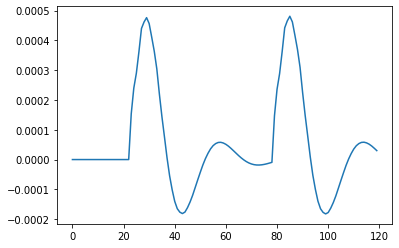

In [31]:
#b
a, b = sintesis['coef'], sintesis['ganancia'][0]
x = sintesis['excit'][100]

# 120 muestras, 15ms todas las muestras.
plt.plot(lfilter([b[i]], a[100], x))

([<matplotlib.lines.Line2D at 0x7fb761213a58>],
 array([ 6.70209597e-05, -3.21546787e-04, -9.99037653e-05, ...,
         8.28647779e-04,  7.08913931e-04,  9.03244615e-04]))

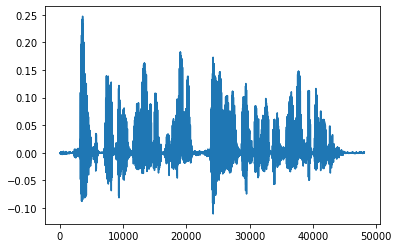

In [23]:
#c
y = []
x = sintesis['excit']
a = sintesis['coef']
b = sintesis['ganancia'][0]
longitud = len(a)
for i in range(longitud):
    y = np.concatenate((y, lfilter([b[i]], a[i], x[i])), axis=None)
scipy.io.wavfile.write('vocoder1.wav', 8000, y)
plt.plot(y), y

([<matplotlib.lines.Line2D at 0x7fb7629e2940>],
 array([ 0.00027064, -0.00129844, -0.00040342, ...,  0.00321958,
         0.00273633,  0.0035213 ]))

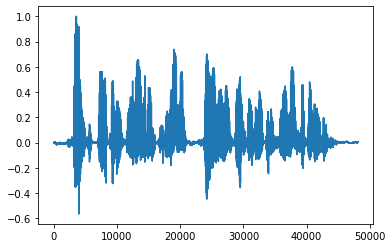

In [22]:
#e
y = []
x = sintesis['excit']
a = sintesis['coef']
b = sintesis['ganancia'][0]
longitud = len(a)
zf = np.zeros(10)
for i in range(longitud):
    filtro, zf = lfilter([b[i]], a[i], x[i], axis= -1, zi=zf)
    y = np.append(y, filtro)

y_max = max(abs(y))
y /= y_max
scipy.io.wavfile.write('vocoder2.wav', 8000, y)
plt.plot(y), y

([<matplotlib.lines.Line2D at 0x7fb76525d6a0>],
 array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.02344559,  0.03657405,
         0.04421823,  0.05513806,  0.06709996,  0.07040177,  0.07264265,
         0.06961394,  0.06267164,  0.05544325,  0.04637968,  0.03354086,
         0.02190628,  0.0114518 ,  0.00084434, -0.0083271 , -0.01547651,
        -0.02140684, -0.02515182, -0.02693132, -0.02764892, -0.02688101,
        -0.02460933, -0.02172606, -0.01829219, -0.01433501, -0.01036284,
        -0.00649428, -0.00277466,  0.00046131,  0.00318044,  0.00545017,
         0.00711563,  0.00817264,  0.00874538,  0.00882784,  0.00846946,
         0.00779669,  0.00685648,  0.00571694,  0.00449394,  0.00324001,
   

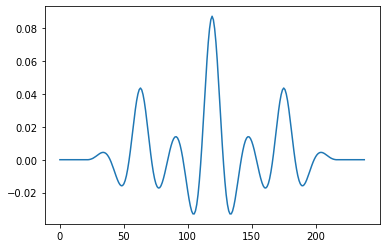

(56, 0.08733926493680906, 0.04363055881443373)

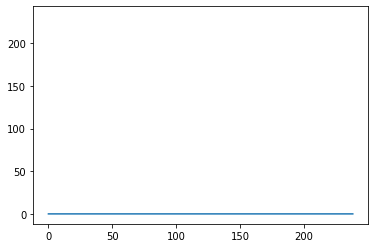

In [41]:
# Part B, c
a, b = sintesis['coef'], sintesis['ganancia'][0]
x = sintesis['excit'][100]
y = lfilter([b[100]], a[100], x)
Ryy = convolve(y, y[::-1])
Ryy = list(Ryy)
peaks = []
for i in range(1, len(Ryy)-1):
    prev = Ryy[i-1]
    curr = Ryy[i]
    nxt = Ryy[i+1]
    if prev < curr and curr > nxt:
        peaks.append([i, curr])
peaks.sort(reverse=True, key=lambda x : x[1] )
Ryy0 = peaks[0][1].item()
pos_Ryy0 = peaks[0][0]
RyyN = peaks[1][1].item()
pos_RyyN = peaks[1][0]
N = abs(pos_Ryy0 - pos_RyyN)

